In [1]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.utils import plot_model

%matplotlib inline

coffee = pd.read_csv('./working_coffee_csv.csv')
coffee.head()

coffee['Date'] = pd.to_datetime(coffee['Date'])
coffee = coffee.set_index("Date")

coffee_shift_df = pd.concat([coffee[['Title']].shift(1),coffee[['Rate_of_Change']].shift(1),\
                             coffee[['CV_Vectors']].shift(1),coffee[['TFIDF_Vectors']].shift(1),\
                             coffee[['Hash_Vectors']].shift(1),coffee[['Price']]],axis=1)
coffee_shift_df.dropna(inplace=True)
coffee_shift_df.head()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,Title,Rate_of_Change,CV_Vectors,TFIDF_Vectors,Hash_Vectors,Price
Date,,,,,,
2007-01-03,India earns more from higher coffee exports in...,0.000000,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.],1.1760
2007-01-04,Friesland raises stake in Indonesian subsidiar...,0.022075,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.],1.1451
2007-01-05,Nymex announces start date for soft commodity ...,-0.026276,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.],1.1506
2007-01-07,India's largest coffee chain extends to Pakistan,0.004803,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.],1.1506
2007-01-09,Honduran coffee sales Ugandan coffee funds Soy...,0.000000,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.],1.1290


In [2]:
X = coffee_shift_df['Title']
y = coffee_shift_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()

# list of text documents -> coffee['Tokenized']

# create the transform
vectorizer = TfidfVectorizer(stop_words='english')

# tokenize and build vocab
vectorizer.fit(X_train)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# encode document
X_train_vector = vectorizer.transform(X_train)
X_test_vector = vectorizer.transform(X_test)
# summarize encoded vector
# print(vector.shape)
# print(vector.toarray())


X_train_scaled = ss.fit_transform(X_train_vector.toarray())
X_test_scaled = ss.transform(X_test_vector.toarray())
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)

{'crop': 692, 'stress': 2651, 'drives': 877, 'cbot': 496, 'corn': 654, 'futures': 1191, 'people': 1947, 'places': 1986, 'charts': 525, 'brazil': 383, 'coffee': 575, 'thought': 2772, 'storms': 2635, 'curtail': 712, 'key': 1509, 'centam': 503, 'crops': 693, 'indonesia': 1417, 'import': 1388, 'rice': 2303, 'lift': 1577, 'stocks': 2627, 'sharp': 2434, 'increase': 1404, 'vietnam': 2939, 'prices': 2072, 'stalls': 2599, 'trade': 2815, 'prompt': 2110, 'cut': 716, 'nicaragua': 1807, 'forecast': 1145, 'cameroon': 451, 'takes': 2731, 'steps': 2619, 'combat': 584, 'cocoa': 571, 'pests': 1963, 'ice': 1366, 'review': 2287, 'unfavourable': 2875, 'weather': 2994, 'boosts': 365, 'media': 1694, 'watch': 2978, 'aug': 267, '26': 54, '2013': 39, 'lower': 1630, 'weakening': 2990, 'demand': 772, 'fo': 1128, 'licht': 1573, 'sees': 2401, 'record': 2192, '2012': 38, '13': 14, 'nestle': 1799, 'build': 413, 'new': 1804, 'plant': 1990, 'dubai': 887, 'indian': 1412, 'production': 2091, 'pegged': 1944, 'uganda': 286

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [3]:
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image

Train on 1098 samples, validate on 366 samples
Epoch 1/450
1098/1098 [==============================] - 1s 476us/step - loss: 20.1539 - val_loss: 4.4655
Epoch 2/450
1098/1098 [==============================] - 0s 230us/step - loss: 23.3360 - val_loss: 3.8272
Epoch 3/450
1098/1098 [==============================] - 0s 184us/step - loss: 18.3663 - val_loss: 3.2875
Epoch 4/450
1098/1098 [==============================] - 0s 260us/step - loss: 12.9519 - val_loss: 3.1931
Epoch 5/450
1098/1098 [==============================] - 0s 260us/step - loss: 11.8128 - val_loss: 2.9650
Epoch 6/450
1098/1098 [==============================] - 0s 250us/step - loss: 9.1490 - val_loss: 1.9783
Epoch 7/450
1098/1098 [==============================] - 0s 353us/step - loss: 7.2612 - val_loss: 1.9488
Epoch 8/450
1098/1098 [==============================] - 0s 322us/step - loss: 5.9658 - val_loss: 2.0201
Epoch 9/450
1098/1098 [==============================] - 0s 226us/step - loss: 6.1578 - val_loss: 1.9832
Epo

Epoch 78/450
1098/1098 [==============================] - 0s 240us/step - loss: 0.1454 - val_loss: 0.2608
Epoch 79/450
1098/1098 [==============================] - 0s 232us/step - loss: 0.1442 - val_loss: 0.2559
Epoch 80/450
1098/1098 [==============================] - 0s 217us/step - loss: 0.1425 - val_loss: 0.2512
Epoch 81/450
1098/1098 [==============================] - 0s 158us/step - loss: 0.1262 - val_loss: 0.2426
Epoch 82/450
1098/1098 [==============================] - 0s 199us/step - loss: 0.1276 - val_loss: 0.2413
Epoch 83/450
1098/1098 [==============================] - 0s 180us/step - loss: 0.1221 - val_loss: 0.2391
Epoch 84/450
1098/1098 [==============================] - 0s 183us/step - loss: 0.1364 - val_loss: 0.2353
Epoch 85/450
1098/1098 [==============================] - 0s 194us/step - loss: 0.1200 - val_loss: 0.2318
Epoch 86/450
1098/1098 [==============================] - 0s 180us/step - loss: 0.1167 - val_loss: 0.2332
Epoch 87/450
1098/1098 [======================

Epoch 155/450
1098/1098 [==============================] - 0s 245us/step - loss: 0.0661 - val_loss: 0.1791
Epoch 156/450
1098/1098 [==============================] - 0s 245us/step - loss: 0.0517 - val_loss: 0.1754
Epoch 157/450
1098/1098 [==============================] - 0s 282us/step - loss: 0.0587 - val_loss: 0.1766
Epoch 158/450
1098/1098 [==============================] - 0s 248us/step - loss: 0.0617 - val_loss: 0.1758
Epoch 159/450
1098/1098 [==============================] - 0s 219us/step - loss: 0.0603 - val_loss: 0.1733
Epoch 160/450
1098/1098 [==============================] - 0s 245us/step - loss: 0.0557 - val_loss: 0.1733
Epoch 161/450
1098/1098 [==============================] - 0s 231us/step - loss: 0.0568 - val_loss: 0.1722
Epoch 162/450
1098/1098 [==============================] - 0s 224us/step - loss: 0.0619 - val_loss: 0.1773
Epoch 163/450
1098/1098 [==============================] - 0s 294us/step - loss: 0.0597 - val_loss: 0.1731
Epoch 164/450
1098/1098 [============

1098/1098 [==============================] - 0s 229us/step - loss: 0.0377 - val_loss: 0.1642
Epoch 308/450
1098/1098 [==============================] - 0s 291us/step - loss: 0.0370 - val_loss: 0.1653
Epoch 309/450
1098/1098 [==============================] - 0s 187us/step - loss: 0.0359 - val_loss: 0.1624
Epoch 310/450
1098/1098 [==============================] - 0s 171us/step - loss: 0.0405 - val_loss: 0.1630
Epoch 311/450
1098/1098 [==============================] - 0s 199us/step - loss: 0.0378 - val_loss: 0.1599
Epoch 312/450
1098/1098 [==============================] - 0s 182us/step - loss: 0.0346 - val_loss: 0.1635
Epoch 313/450
1098/1098 [==============================] - 0s 180us/step - loss: 0.0350 - val_loss: 0.1593
Epoch 314/450
1098/1098 [==============================] - 0s 181us/step - loss: 0.0375 - val_loss: 0.1625
Epoch 315/450
1098/1098 [==============================] - 0s 162us/step - loss: 0.0397 - val_loss: 0.1638
Epoch 316/450
1098/1098 [==========================

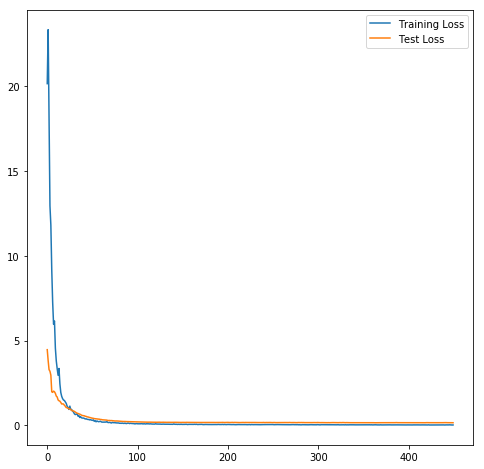

In [7]:
model = Sequential()
model.add(Dense(45, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(.50))
model.add(Dense(15, activation='relu'))#adds a second layer. 
model.add(Dropout(.25))
model.add(Dense(1))#LAST OUTPUT NEURON HAS TO BE ONE, NO ACTIVATION FUNCTION. 

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=450)
#all of this should be in one cell.

model.summary()

history.history.keys()

plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [8]:
plt(model, to_file='model.png', show_shapes=True)
Image('model.png')
plt.show()

TypeError: 'module' object is not callable

In [18]:
predicted = model.predict(X_test_scaled)
#predicted = np.reshape(predicted, (predicted.size,))
var = (predicted, y_test)

## LSTM Attempt - Keras Tokenizer, text to matrix


In [20]:
coffee.tail(2)

,Title,Price,Price_Change,Direction,Rate_of_Change,CV_Vectors,TFIDF_Vectors,Hash_Vectors
Date,,,,,,,,
2018-03-29,"IEG Vu: Easter email alert schedule, customer ...",1.1239,-0.0023,0,-0.002042,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]
2018-04-03,Futures Review: Arabica coffee hits 10-month l...,1.1262,0.0023,0,0.002046,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]


In [21]:
X = coffee_shift_df['Title']
y = coffee_shift_df['Price']


ss = StandardScaler()

In [22]:
tokenizer = Tokenizer()

In [23]:
X_train_token = tokenizer.fit_on_texts(X)
X_train_matrix = tokenizer.texts_to_matrix(X)
#X_test_matrix = tokenizer.texts_to_matrix(X_test) forget about this for now

In [24]:
X_train_matrix.shape

(1464, 3822)

In [25]:
vocab_size = len(tokenizer.word_index) + 1

In [26]:
model = Sequential()
model.add(Dense(12, input_dim=vocab_size))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(1, activation= 'relu'))

model.compile(loss='mean_squared_error', optimizer='adam')

hist = model.fit(X_train_matrix, y, batch_size=15, epochs = 125, validation_split=.15)
model.summary()

Train on 1244 samples, validate on 220 samples
Epoch 1/125
1244/1244 [==============================] - 1s 426us/step - loss: 0.6882 - val_loss: 0.1124
Epoch 2/125
1244/1244 [==============================] - 0s 201us/step - loss: 0.2018 - val_loss: 0.0781
Epoch 3/125
1244/1244 [==============================] - 0s 220us/step - loss: 0.1045 - val_loss: 0.0708
Epoch 4/125
1244/1244 [==============================] - 0s 209us/step - loss: 0.0696 - val_loss: 0.0681
Epoch 5/125
1244/1244 [==============================] - 0s 238us/step - loss: 0.0528 - val_loss: 0.0793
Epoch 6/125
1244/1244 [==============================] - 0s 232us/step - loss: 0.0439 - val_loss: 0.0814
Epoch 7/125
1244/1244 [==============================] - 0s 296us/step - loss: 0.0427 - val_loss: 0.0856
Epoch 8/125
1244/1244 [==============================] - 0s 285us/step - loss: 0.0420 - val_loss: 0.0889
Epoch 9/125
1244/1244 [==============================] - 0s 255us/step - loss: 0.0407 - val_loss: 0.0917
Epoch 10

Epoch 78/125
1244/1244 [==============================] - 0s 214us/step - loss: 0.0040 - val_loss: 0.0923
Epoch 79/125
1244/1244 [==============================] - 0s 209us/step - loss: 0.0034 - val_loss: 0.0941
Epoch 80/125
1244/1244 [==============================] - 0s 211us/step - loss: 0.0029 - val_loss: 0.0897
Epoch 81/125
1244/1244 [==============================] - 0s 201us/step - loss: 0.0025 - val_loss: 0.1056
Epoch 82/125
1244/1244 [==============================] - 0s 215us/step - loss: 0.0026 - val_loss: 0.0911
Epoch 83/125
1244/1244 [==============================] - 0s 244us/step - loss: 0.0027 - val_loss: 0.0981
Epoch 84/125
1244/1244 [==============================] - 0s 245us/step - loss: 0.0026 - val_loss: 0.0926
Epoch 85/125
1244/1244 [==============================] - 0s 207us/step - loss: 0.0025 - val_loss: 0.0940
Epoch 86/125
1244/1244 [==============================] - 0s 204us/step - loss: 0.0025 - val_loss: 0.0954
Epoch 87/125
1244/1244 [======================

In [27]:
#print(hist.history)

In [28]:
hist.history.keys()

dict_keys(['val_loss', 'loss'])

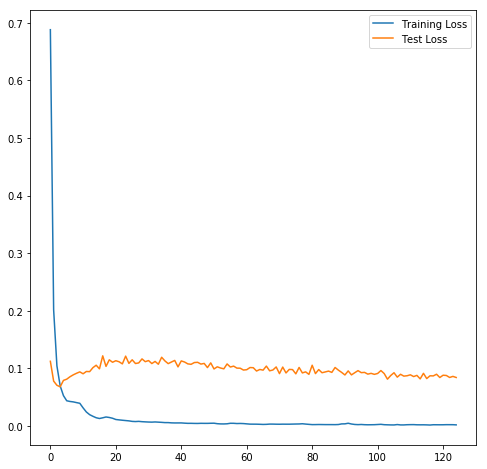

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label= 'Test Loss')
plt.legend()

### New LSTM


In [43]:
tokenizer = Tokenizer()

X = coffee_shift_df['Title']
y = coffee_shift_df['Price']

X_token = tokenizer.fit_on_texts(X)
X_matrix = tokenizer.texts_to_matrix(X)
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()

model.add(Embedding(vocab_size, 150))
model.add(LSTM(20, activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.20))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer = 'adam')

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 150)         573300    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                13680     
_________________________________________________________________
dense_9 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 16        
Total params: 587,311
Trainable params: 587,311
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_matrix, y, epochs=20, validation_split=0.20, batch_size=15, callbacks=[tensorboard])

Train on 1171 samples, validate on 293 samples
Epoch 1/20
1171/1171 [==============================] - 209s 179ms/step - loss: 0.4997 - val_loss: 0.0621
Epoch 2/20
1171/1171 [==============================] - 214s 183ms/step - loss: 0.2795 - val_loss: 0.0206
Epoch 3/20
1171/1171 [==============================] - 227s 194ms/step - loss: 0.2706 - val_loss: 0.0192
Epoch 4/20
1171/1171 [==============================] - 263s 225ms/step - loss: 0.2660 - val_loss: 0.0264
Epoch 5/20
1171/1171 [==============================] - 234s 200ms/step - loss: 0.2550 - val_loss: 0.0187
Epoch 6/20
1171/1171 [==============================] - 390s 333ms/step - loss: 0.2628 - val_loss: 0.0799
Epoch 7/20
1171/1171 [==============================] - 411s 351ms/step - loss: 0.2569 - val_loss: 0.0325
Epoch 8/20
1171/1171 [==============================] - 377s 322ms/step - loss: 0.2581 - val_loss: 0.0265
Epoch 9/20
1171/1171 [==============================] - 422s 360ms/step - loss: 0.2506 - val_loss: 0.0278

In [46]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

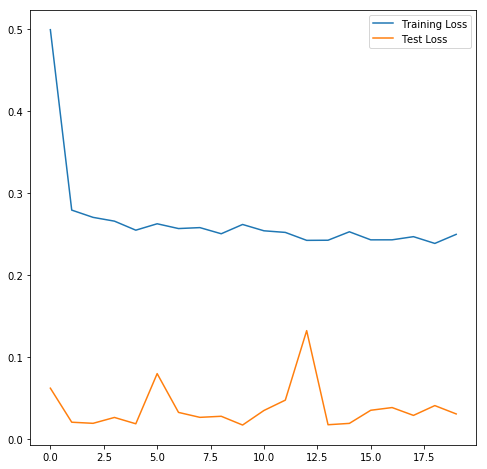

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [48]:
model.evaluate()

ValueError: If evaluating from data tensors, you should specify the `steps` argument.

In [ ]:
from keras.callbacks import TensorBoard

In [ ]:
tensorboard = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)